 # Dialogue State Tracking Analysis


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd

# Update the path to the file as per your Google Drive structure
file_path = '/content/drive/MyDrive/Project/final_results.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,cid,text,original_intent,confirmed_intent,intent_flag,original_slots,NLU_slots,slot_percentage,whatever_original,whatever_NLU,whatever_check,original_status,DST_status,status_flag,DST_result,JGA
0,6.0,به ریال بگو,convert_currency,ask_currency,0,"['source_currency', 'dest_currency']","['country', 'currency']",1,0.0,0.0,1,completed,completed,1,"{'country': 'چین', 'currency': 'یوآن'}",0
1,9.0,به تومن,convert_currency,ask_currency,0,"['source_currency', 'dest_currency']","['country', 'currency']",1,0.0,0.0,1,completed,completed,1,"{'country': 'ترکیه', 'currency': 'لیر'}",0
2,15.0,قیمت درهم و یوان و پوند و دلارو بگو,convert_currency,ask_currency,0,"['source_currency', 'dest_currency']","['currency', 'currency', 'currency', 'currency']",1,0.0,0.0,1,completed,completed,1,{'currency': 'دلارو'},0
3,22.0,میخام پولامو از تومان تبدیل کنم به ارز قیمت ار...,convert_currency,oos,0,['source_currency'],['currency'],1,0.0,0.0,1,not-completed,not-completed,1,['متاسفانه قادر به پاسخگویی به خواسته شما نیست...,0
4,22.0,دینار کویت که الان خیلی گرونه,convert_currency,ask_currency,0,"['source_currency', 'dest_currency']","['currency', 'currency']",1,0.0,0.0,1,completed,completed,1,{'currency': 'دینار کویت'},0


In [64]:

import matplotlib.pyplot as plt

In [65]:
# Assuming df is your DataFrame and 'original_intent' is the column with intent information

# Get the number of unique intents
number_of_intents = df['original_intent'].nunique()

print(f"Number of unique intents: {number_of_intents}")

Number of unique intents: 33


### Joint Goal Accuracy (JGA)
The proportion of turns where both the intent and the slots are correctly identified.

In [66]:
# Calculate Joint Goal Accuracy (JGA)
df['joint_goal'] = df.apply(lambda row: row['intent_flag'] == 1 and row['slot_percentage'] == 1.0 and row['whatever_check']==1.0 and row['status_flag']==1.0, axis=1)
jga = df['joint_goal'].mean()

# Total number of rows
total_count = df['joint_goal'].count()

# Count of True values
true_count = df['joint_goal'].sum()

# Calculate the percentage
percentage = (true_count / total_count) * 100

print(f"Joint Goal Accuracy (JGA): {jga}")
print(f'Total number of rows: {total_count}')
print(f'Count of True values: {true_count}')
print(f'Percentage of True values: {percentage:.2f}%')

Joint Goal Accuracy (JGA): 0.45663454410674575
Total number of rows: 1349
Count of True values: 616
Percentage of True values: 45.66%


In [69]:
# Calculate Joint Goal Accuracy (JGA) for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()

# Count how many intents have JGA greater than 50%
intents_above_mean = (jga_per_intent > 0.45).sum()

intents_above_mean

22

In [55]:
# Count how many intents have JGA greater than 50%
intents_above_mean = (jga_per_intent == 0).sum()

intents_above_mean

1

Worst 5 intents in terms of JGA:
original_intent
next_event_date     0.100000
convert_currency    0.106195
ask_math            0.125000
unit_convert        0.298851
ask_currency        0.300000
Name: joint_goal, dtype: float64


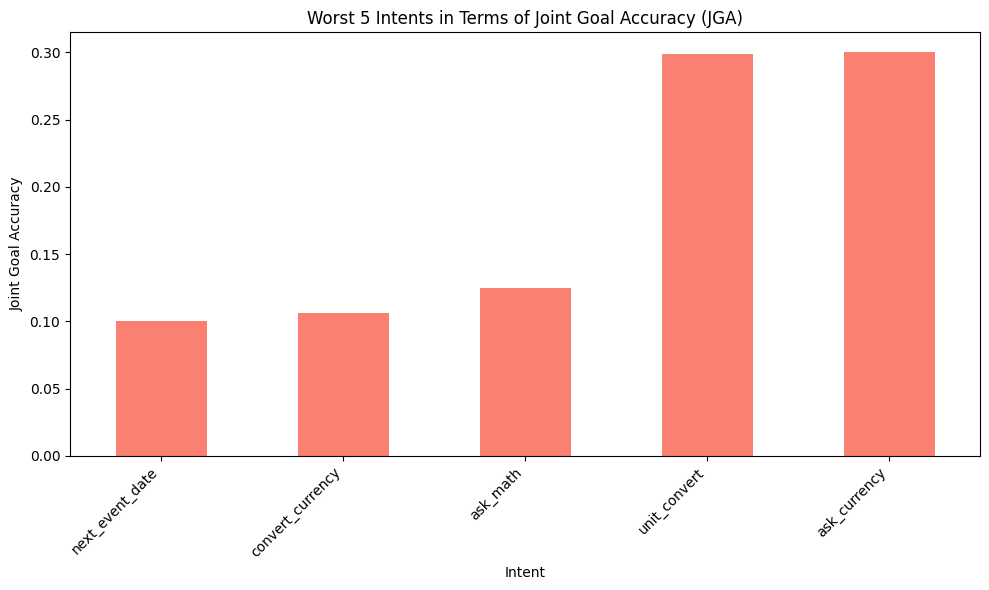

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your actual data

# Recalculate the Joint Goal Accuracy (JGA) column
df['joint_goal'] = df.apply(lambda row: row['intent_flag'] == 1 and row['slot_percentage'] == 1.0 and row['whatever_check'] == 1.0 and row['status_flag'] == 1.0, axis=1)

# Calculate Joint Goal Accuracy (JGA) for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()

# Sort intents by JGA in ascending order
jga_sorted = jga_per_intent.sort_values()

# Identify the worst intents
num_worst_intents = 5  # Change this number to see more or fewer worst intents
worst_intents = jga_sorted.head(num_worst_intents)

print(f"Worst {num_worst_intents} intents in terms of JGA:")
print(worst_intents)

# Plot the worst intents
plt.figure(figsize=(10, 6))
worst_intents.plot(kind='bar', color='salmon')
plt.xlabel('Intent')
plt.ylabel('Joint Goal Accuracy')
plt.title(f'Worst {num_worst_intents} Intents in Terms of Joint Goal Accuracy (JGA)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

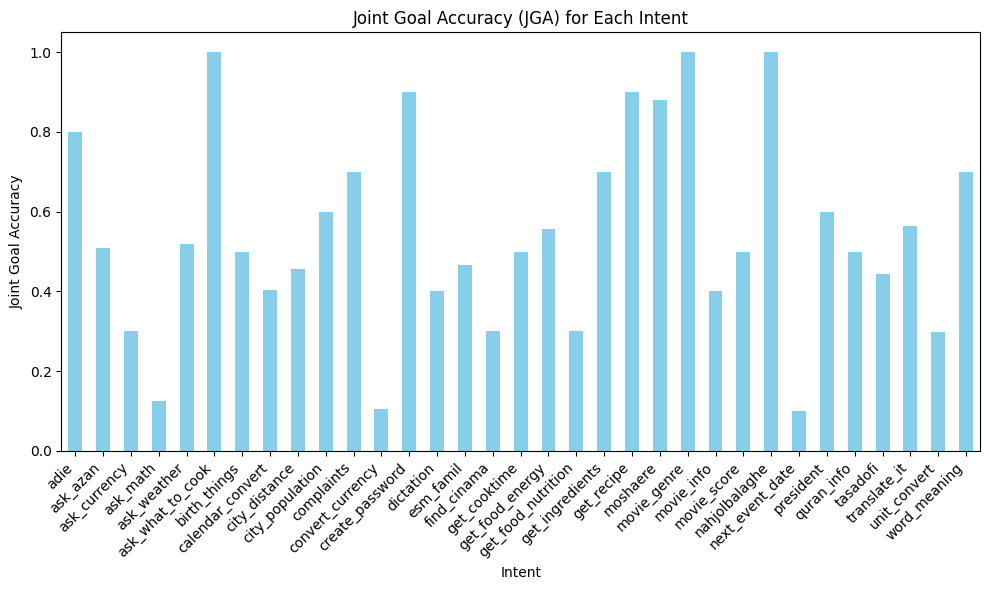

In [68]:
# Recalculate the Joint Goal Accuracy (JGA) column
df['joint_goal'] = df.apply(lambda row: row['intent_flag'] == 1 and row['slot_percentage'] == 1.0 and row['whatever_check']==1.0 and row['status_flag']==1.0, axis=1)
# Calculate Joint Goal Accuracy (JGA) for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()

# Plot Joint Goal Accuracy (JGA) for each intent
plt.figure(figsize=(10, 6))
jga_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Joint Goal Accuracy')
plt.title('Joint Goal Accuracy (JGA) for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Flexible Goal Accuracy (FGA)
The proportion of turns where either the intent or the slots are correctly identified.

In [70]:
# Calculate Flexible Goal Accuracy (FGA)
df['flexible_goal'] = df.apply(lambda row: row['intent_flag'] == 1 or row['slot_percentage'] == 1.0 or  row['whatever_check']==1.0 or row['status_flag']==1.0, axis=1)
fga = df['flexible_goal'].mean()

print(f"Flexible Goal Accuracy (FGA): {fga}")

Flexible Goal Accuracy (FGA): 0.9985174203113417


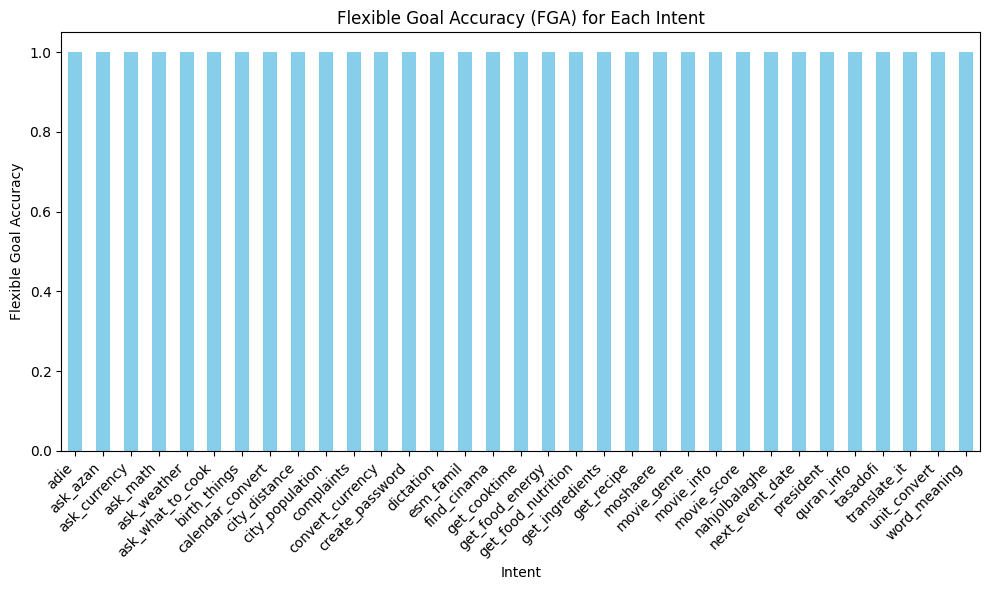

In [17]:
# Recalculate the Flexible Goal Accuracy (FGA) column
df['flexible_goal'] = df.apply(lambda row: row['intent_flag'] == 1 or row['slot_percentage'] == 1.0 or  row['whatever_check']==1.0 or row['status_flag']==1.0, axis=1)

# Calculate Flexible Goal Accuracy (FGA) for each intent
fga_per_intent = df.groupby('original_intent')['flexible_goal'].mean()

# Plot Flexible Goal Accuracy (FGA) for each intent
plt.figure(figsize=(10, 6))
fga_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Flexible Goal Accuracy')
plt.title('Flexible Goal Accuracy (FGA) for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average Goal Accuracy

In [73]:
# Calculate AGA
status_accuracy = (df['status_flag'] == 1).mean()
whatever_accuracy = (df['whatever_check'] == 1).mean()
intent_accuracy = (df['intent_flag'] == 1).mean()
slot_accuracy = (df['slot_percentage'] == 1).mean()
aga = (status_accuracy + slot_accuracy + intent_accuracy + whatever_accuracy)/4

print(f'status average : {status_accuracy}')
print(f'whatever average : {whatever_accuracy}')
print(f'intent average : {intent_accuracy}')
print(f'slot average : {slot_accuracy}')
print(f"Average Goal Accuracy (AGA): {aga}")

status average : 0.6434395848776872
whatever average : 0.994069681245367
intent average : 0.8443291326908822
slot average : 0.6397331356560415
Average Goal Accuracy (AGA): 0.7803928836174944


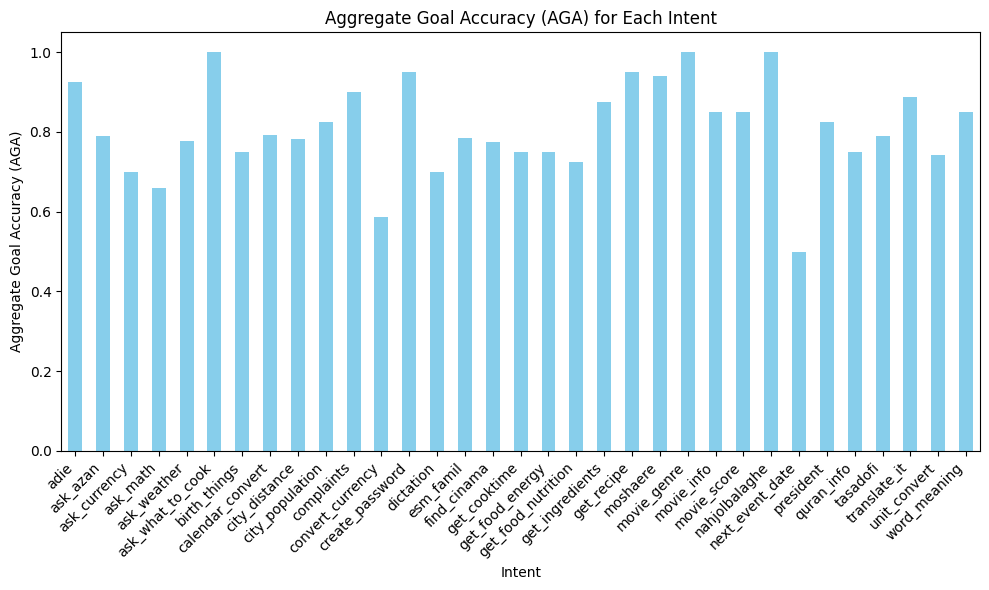

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert columns to numeric types, coercing errors to NaN
df['slot_percentage'] = pd.to_numeric(df['slot_percentage'], errors='coerce')
df['whatever_check'] = pd.to_numeric(df['whatever_check'], errors='coerce')
df['status_flag'] = pd.to_numeric(df['status_flag'], errors='coerce')
df['intent_flag'] = pd.to_numeric(df['intent_flag'], errors='coerce')

# Calculate AGA for each intent
def calculate_aga(group):
    intent_accuracy = (group['intent_flag']==1).mean()
    slot_accuracy = (group['slot_percentage'] == 1.0).mean()
    whatever_check_accuracy = (group['whatever_check'] == 1.0).mean()
    status_accuracy = (group['status_flag'] == 1.0).mean()
    return (intent_accuracy + slot_accuracy + whatever_check_accuracy + status_accuracy) / 4

aga_per_intent = df.groupby('original_intent').apply(calculate_aga)

# Plot the AGA for each intent
plt.figure(figsize=(10, 6))
aga_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Aggregate Goal Accuracy (AGA)')
plt.title('Aggregate Goal Accuracy (AGA) for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Status Accuracy

In [81]:
# Calculate Status Accuracy
df['status_accuracy'] = df.apply(lambda row: row['status_flag'] == 1, axis=1)
status_accuracy = df['status_accuracy'].mean()

print(f"Status Accuracy: {status_accuracy}")

Status Accuracy: 0.6434395848776872


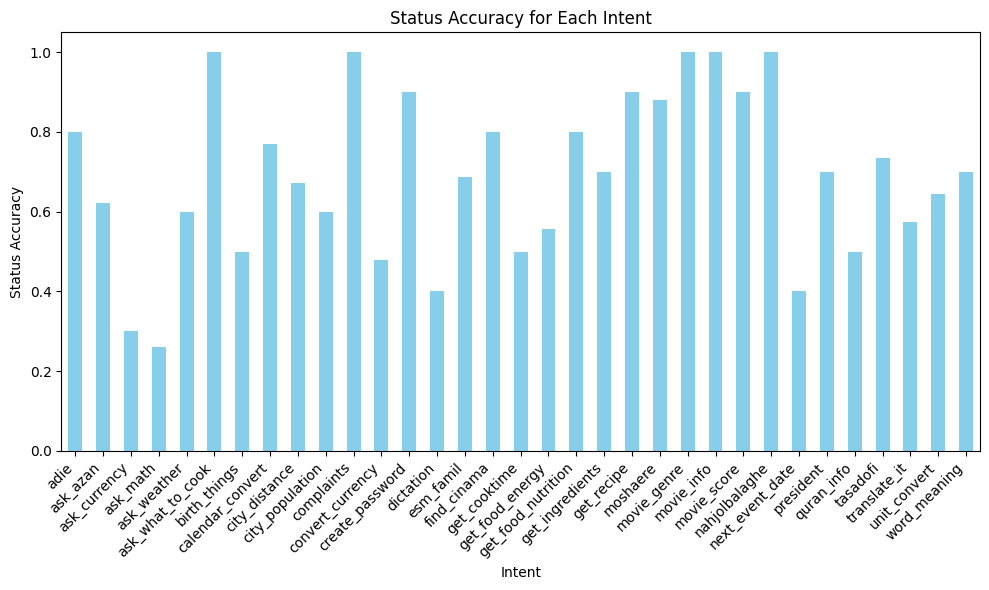

In [82]:
# Calculate Dialogue Turn Accuracy
df['status_accuracy'] = df.apply(lambda row: row['status_flag'] == 1, axis=1)
# Calculate Dialogue Turn Accuracy for each intent
status_accuracy_per_intent = df.groupby('original_intent')['status_accuracy'].mean()

# Plot Dialogue Turn Accuracy for each intent
plt.figure(figsize=(10, 6))
status_accuracy_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Status Accuracy')
plt.title('Status Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Slot Filling Accuracy

In [78]:
slot_filling_accuracy = df['slot_percentage'].mean()
print(slot_filling_accuracy)

0.7178916109873794


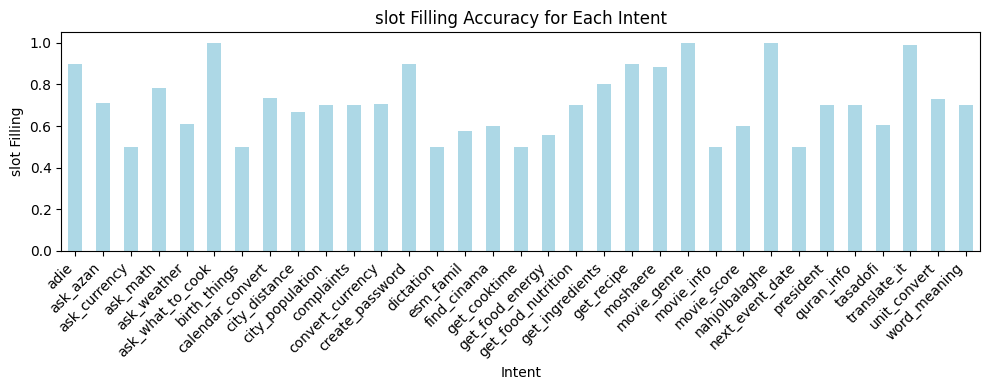

In [25]:
# Calculate Slot Filling Accuracy for each intent
slot_filling_accuracy_per_intent = df.groupby('original_intent')['slot_percentage'].mean()

# Plot Slot Filling Accuracy for each intent
plt.figure(figsize=(10, 4))
slot_filling_accuracy_per_intent.plot(kind='bar', color='lightblue')
plt.xlabel('Intent')
plt.ylabel('slot Filling')
plt.title('slot Filling Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Intent Recognition Accuracy
This metric measures the percentage of correctly identified intents out of all intents.


In [79]:
# Intent Recognition Accuracy
intent_recognition_accuracy = df['intent_flag'].mean()

print(f"Intent Recognition Accuracy: {intent_recognition_accuracy}")

Intent Recognition Accuracy: 0.8455827765404603


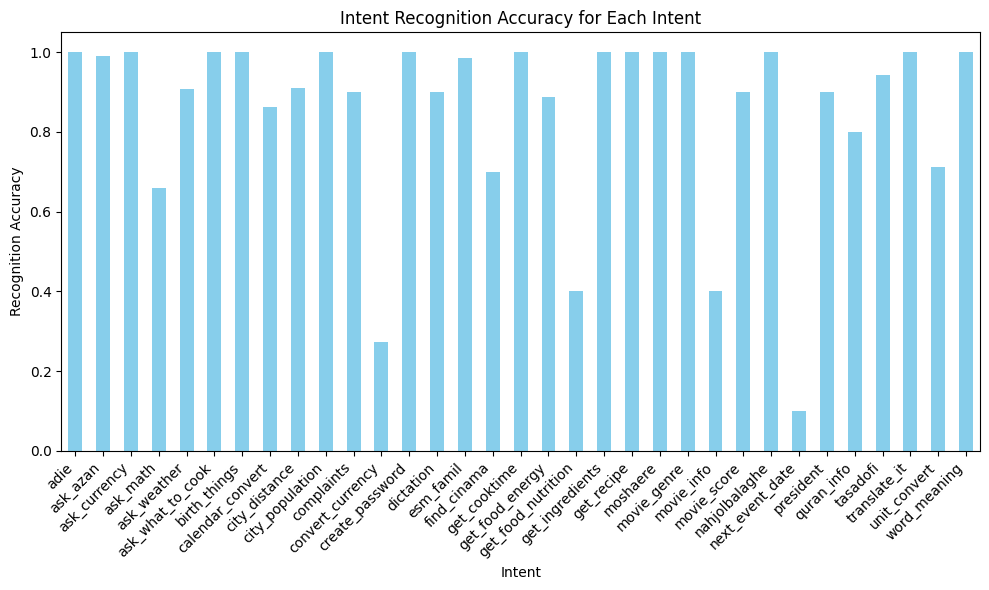

In [80]:
# Calculate Intent Recognition Accuracy for each intent
intent_accuracy = df.groupby('original_intent')['intent_flag'].mean()

# Plot Intent Recognition Accuracy for each intent
plt.figure(figsize=(10, 6))
intent_accuracy.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Recognition Accuracy')
plt.title('Intent Recognition Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Whatever Accuracy

In [83]:
# whatever Accuracy
whatever_accuracy = df['whatever_check'].mean()

print(f"Whatever Accuracy: {whatever_accuracy}")

Whatever Accuracy: 0.9955456570155902


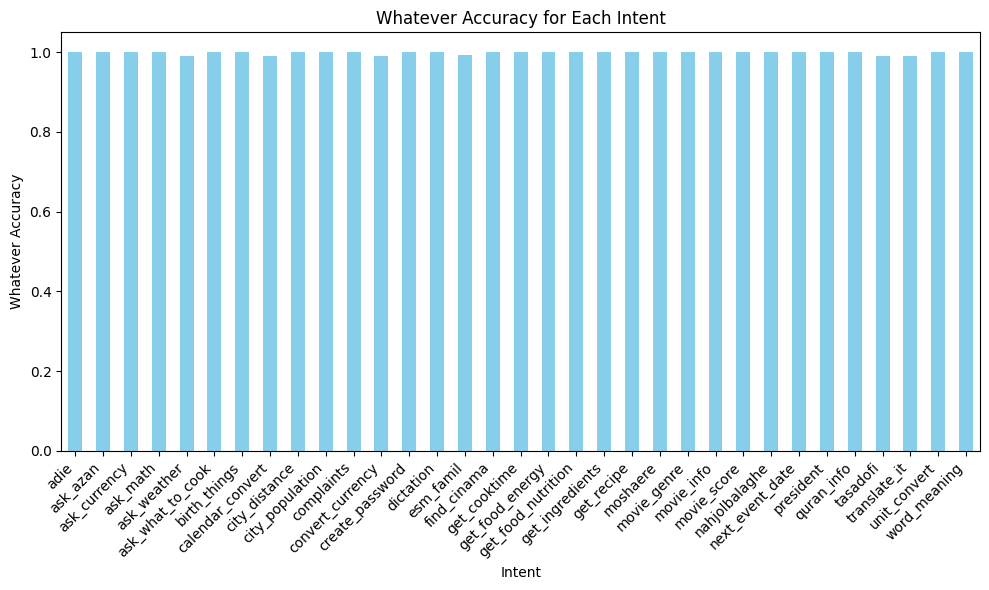

In [84]:
# Calculate whatever_accuracy
whatever_accuracy = df.groupby('original_intent')['whatever_check'].mean()

# Plot Intent Recognition Accuracy for each intent
plt.figure(figsize=(10, 6))
whatever_accuracy.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Whatever Accuracy')
plt.title('Whatever Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### DST server performance by intent

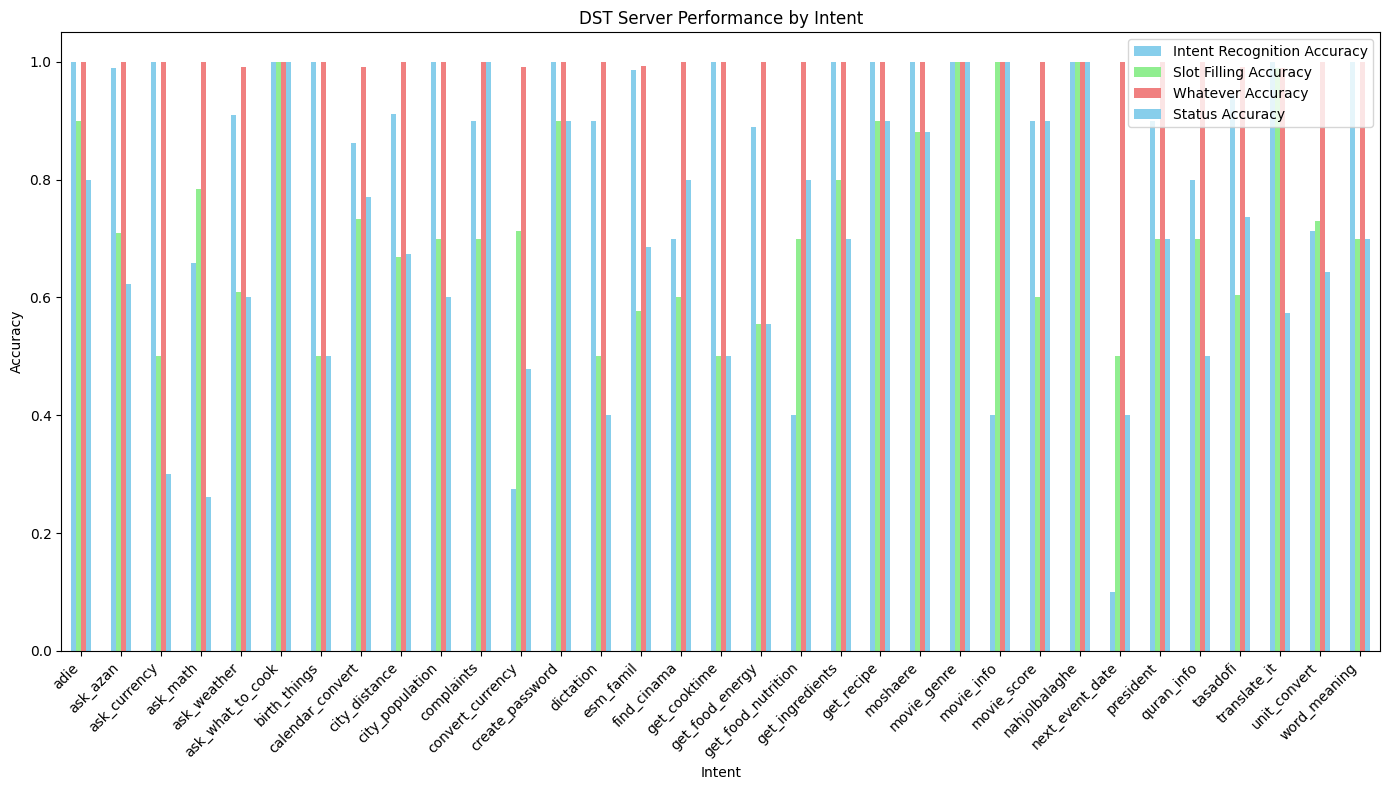

In [85]:
# Calculate Intent Recognition Accuracy for each intent
intent_recognition_accuracy_per_intent = df.groupby('original_intent')['intent_flag'].mean()

# Calculate Slot Filling Accuracy for each intent
slot_filling_accuracy_per_intent = df.groupby('original_intent')['slot_percentage'].mean()

# Calculate Slot Filling Accuracy for each intent
whatever_accuracy_per_intent = df.groupby('original_intent')['whatever_check'].mean()

# Calculate Slot Filling Accuracy for each intent
status_accuracy_per_intent = df.groupby('original_intent')['status_flag'].mean()

#
# # Calculate Joint Goal Accuracy (JGA) for each intent
# jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()
#
# # Calculate Flexible Goal Accuracy (FGA) for each intent
# fga_per_intent = df.groupby('original_intent')['flexible_goal'].mean()
#
# # Calculate Average Goal Accuracy (AGA) for each intent
# aga_per_intent = df.groupby('original_intent')['average_goal'].mean()
#
# # Calculate Average Goal Accuracy (AGA) for each intent
# aga_per_intent = df.groupby('original_intent')['average_goal'].mean()

# Combine all metrics into a single DataFrame for plotting
performance_metrics = pd.DataFrame({
    'Intent Recognition Accuracy': intent_recognition_accuracy_per_intent,
    'Slot Filling Accuracy': slot_filling_accuracy_per_intent,
    'Whatever Accuracy': whatever_accuracy_per_intent,
    'Status Accuracy': status_accuracy_per_intent
})

# Plot the combined metrics
performance_metrics.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Intent')
plt.ylabel('Accuracy')
plt.title('DST Server Performance by Intent')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

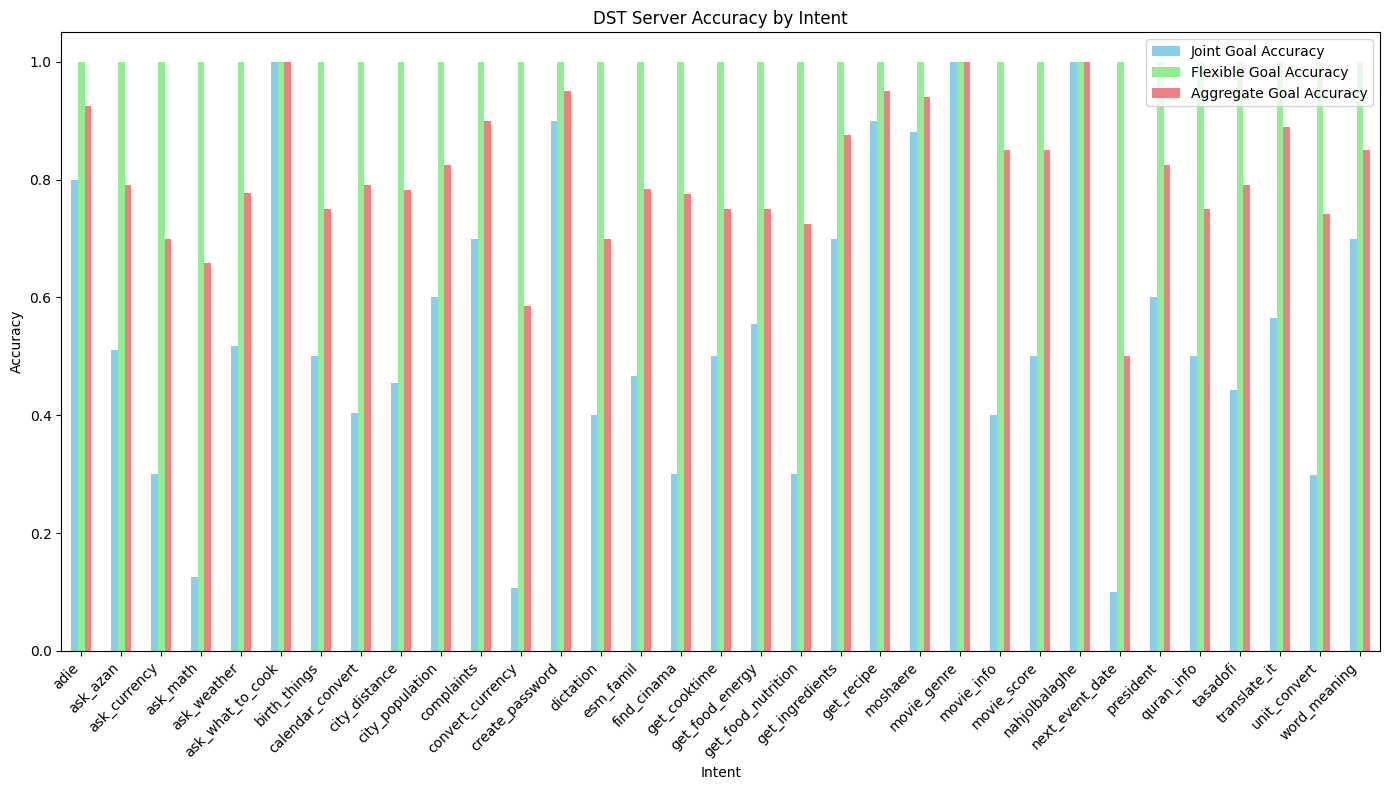

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert columns to numeric types, coercing errors to NaN
df['slot_percentage'] = pd.to_numeric(df['slot_percentage'], errors='coerce')
df['whatever_check'] = pd.to_numeric(df['whatever_check'], errors='coerce')
df['status_flag'] = pd.to_numeric(df['status_flag'], errors='coerce')
df['intent_flag'] = pd.to_numeric(df['intent_flag'], errors='coerce')

# Define the function to calculate AGA
def calculate_aga(group):
    intent_accuracy = (group['intent_flag'] == 1).mean()
    slot_accuracy = (group['slot_percentage'] == 1.0).mean()
    whatever_check_accuracy = (group['whatever_check'] == 1.0).mean()
    status_accuracy = (group['status_flag'] == 1.0).mean()
    return (intent_accuracy + slot_accuracy + whatever_check_accuracy + status_accuracy) / 4

# Calculate AGA for each intent
aga_per_intent = df.groupby('original_intent').apply(calculate_aga)

# Assuming 'joint_goal' and 'flexible_goal' columns are already present in the DataFrame
# Calculate JGA and FGA for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()
fga_per_intent = df.groupby('original_intent')['flexible_goal'].mean()

# Combine all metrics into a single DataFrame for plotting
performance_metrics = pd.DataFrame({
    'Joint Goal Accuracy': jga_per_intent,
    'Flexible Goal Accuracy': fga_per_intent,
    'Aggregate Goal Accuracy': aga_per_intent
})

# Plot the combined metrics
plt.figure(figsize=(14, 8))
performance_metrics.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Intent')
plt.ylabel('Accuracy')
plt.title('DST Server Accuracy by Intent')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()